In [31]:
import kagglehub
path = kagglehub.dataset_download("ayeshaseherr/student-performance")

Using Colab cache for faster access to the 'student-performance' dataset.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv(path + '/StudentPerformanceFactors.csv')
print(df.shape)
df.describe()

(6607, 20)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [33]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#### Описание датасета
`StudentPerformanceFactors` - данные об успеваемости студентов
| Колонка                | Описание                                                                                 |
|------------------------|------------------------------------------------------------------------------------------|
| `Hours_Studied`            | Часы занятий: количество часов, проведённых за учёбой                                   |
| `Attendance`               | Посещаемость: уровень посещения занятий (высокий, низкий)                              |
| `Parental_Involvement`    | Участие родителей: степень вовлечённости родителей в учебный процесс (низкое, среднее, высокое) |
| `Access_to_Resources`     | Доступ к ресурсам: наличие доступа к учебным материалам и ресурсам (да/нет)             |
| `Extracurricular_Activities` | Внеклассные занятия: участие в дополнительных активностях вне учебы                    |
| `Sleep_Hours`              | Часы сна: среднее количество часов сна в сутки                                         |
| `Previous_Scores`          | Предыдущие оценки: средний балл по предыдущим экзаменам                                |
| `Motivation_Level`         | Уровень мотивации: оценка мотивации ученика (низкий, средний, высокий)                 |
| `Internet_Access`          | Доступ к интернету: есть ли у ученика доступ в интернет (да/нет)                       |
| `Tutoring_Sessions`        | Репетиторство: количество часов занятий с репетитором                                 |
| `Family_Income`             | Доход семьи: уровень дохода семьи (низкий, средний, высокий)                          |
| `Teacher_Quality`           | Качество преподавания: оценка качества учителей (низкий, средний, высокий)             |
| `School_Type`                | Тип школы: государственная или частная школа                                          |
| `Peer_Influence`             | Влияние сверстников: отношение одноклассников и их влияние (положительное, нейтральное, отрицательное) |
| `Physical_Activity`          | Физическая активность: уровень физической активности ученика                          |
| `Learning_Disabilities`      | Учебные трудности: наличие образовательных затруднений (да/нет)                      |
| `Parental_Education_Level`   | Уровень образования родителей: накопленное образование родителей  |
| `Distance_from_Home`          | Расстояние от дома: удалённость школы от места проживания (рядом, умеренно, далеко)   |
| `Gender`                      | Пол ученика: мужчина или женщина                                                     |
| `Exam_Score`                   | Балл за экзамен: итоговый результат по экзамену                                     |


##### Описание задач

###### Задача
После категоризации оценок найти наилучшую модель классификации студентов, которая предсказывает их категориальную оценку в разработанной системе

##### Очистка данных (Data Cleaning)
Проверим данные на нулевые значения и пропустим их, приведем типы к pandas категориальным переменным

In [34]:
# Проверка данных на нулевые значения

for column in df.columns:
    print(column, df[column].isnull().sum())

Hours_Studied 0
Attendance 0
Parental_Involvement 0
Access_to_Resources 0
Extracurricular_Activities 0
Sleep_Hours 0
Previous_Scores 0
Motivation_Level 0
Internet_Access 0
Tutoring_Sessions 0
Family_Income 0
Teacher_Quality 78
School_Type 0
Peer_Influence 0
Physical_Activity 0
Learning_Disabilities 0
Parental_Education_Level 90
Distance_from_Home 67
Gender 0
Exam_Score 0


In [35]:
# Уберем строки с нулевыми элементами

without_nulls = df.dropna(axis=0, how='any')

for i in without_nulls.columns:
    print(i, without_nulls[i].isnull().sum())

print(without_nulls.shape)
df = without_nulls

Hours_Studied 0
Attendance 0
Parental_Involvement 0
Access_to_Resources 0
Extracurricular_Activities 0
Sleep_Hours 0
Previous_Scores 0
Motivation_Level 0
Internet_Access 0
Tutoring_Sessions 0
Family_Income 0
Teacher_Quality 0
School_Type 0
Peer_Influence 0
Physical_Activity 0
Learning_Disabilities 0
Parental_Education_Level 0
Distance_from_Home 0
Gender 0
Exam_Score 0
(6378, 20)


In [36]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [37]:
# Приведем типы к категориальным переменным pandas

def convert_string_to_low_medium_high(series: pd.Series) -> pd.Series:
    series = series.astype('category')
    series = series.cat.reorder_categories(['Low', 'Medium', 'High'])
    return series

def convert_string_to_yes_no(series: pd.Series) -> pd.Series:
    series = series.astype('category')
    series = series.cat.reorder_categories(['Yes', 'No'])
    return series

df['Motivation_Level'] = convert_string_to_low_medium_high(df['Motivation_Level'])
df['Parental_Involvement'] = convert_string_to_low_medium_high(df['Parental_Involvement'])
df['Access_to_Resources'] = convert_string_to_low_medium_high(df['Access_to_Resources'])
df['Family_Income'] = convert_string_to_low_medium_high(df['Family_Income'])
df['Teacher_Quality'] = convert_string_to_low_medium_high(df['Teacher_Quality'])

df['Extracurricular_Activities'] = convert_string_to_yes_no(df['Extracurricular_Activities'])
df['Internet_Access'] = convert_string_to_yes_no(df['Internet_Access'])
df['Learning_Disabilities'] = convert_string_to_yes_no(df['Learning_Disabilities'])

In [38]:
print(df.School_Type.unique())
print(df['Peer_Influence'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Gender'].unique())
print(df['Distance_from_Home'].unique())

['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['High School' 'College' 'Postgraduate']
['Male' 'Female']
['Near' 'Moderate' 'Far']


In [39]:
df['School_Type'] = df['School_Type'].astype('category')
df['Peer_Influence'] = df['Peer_Influence'].astype('category')
df['Peer_Influence'] = df['Peer_Influence'].cat.reorder_categories(['Negative', 'Neutral', 'Positive'])
df['Parental_Education_Level'] = df['Parental_Education_Level'].astype('category')
df['Parental_Education_Level'] = df['Parental_Education_Level'].cat.reorder_categories(['High School', 'College', 'Postgraduate'])
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.reorder_categories(['Female', 'Male'])
df['Distance_from_Home'] = df['Distance_from_Home'].astype('category')
df['Distance_from_Home'] = df['Distance_from_Home'].cat.reorder_categories(['Near', 'Moderate', 'Far'])

In [40]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


##### Разведочный анализ данных (EDA)

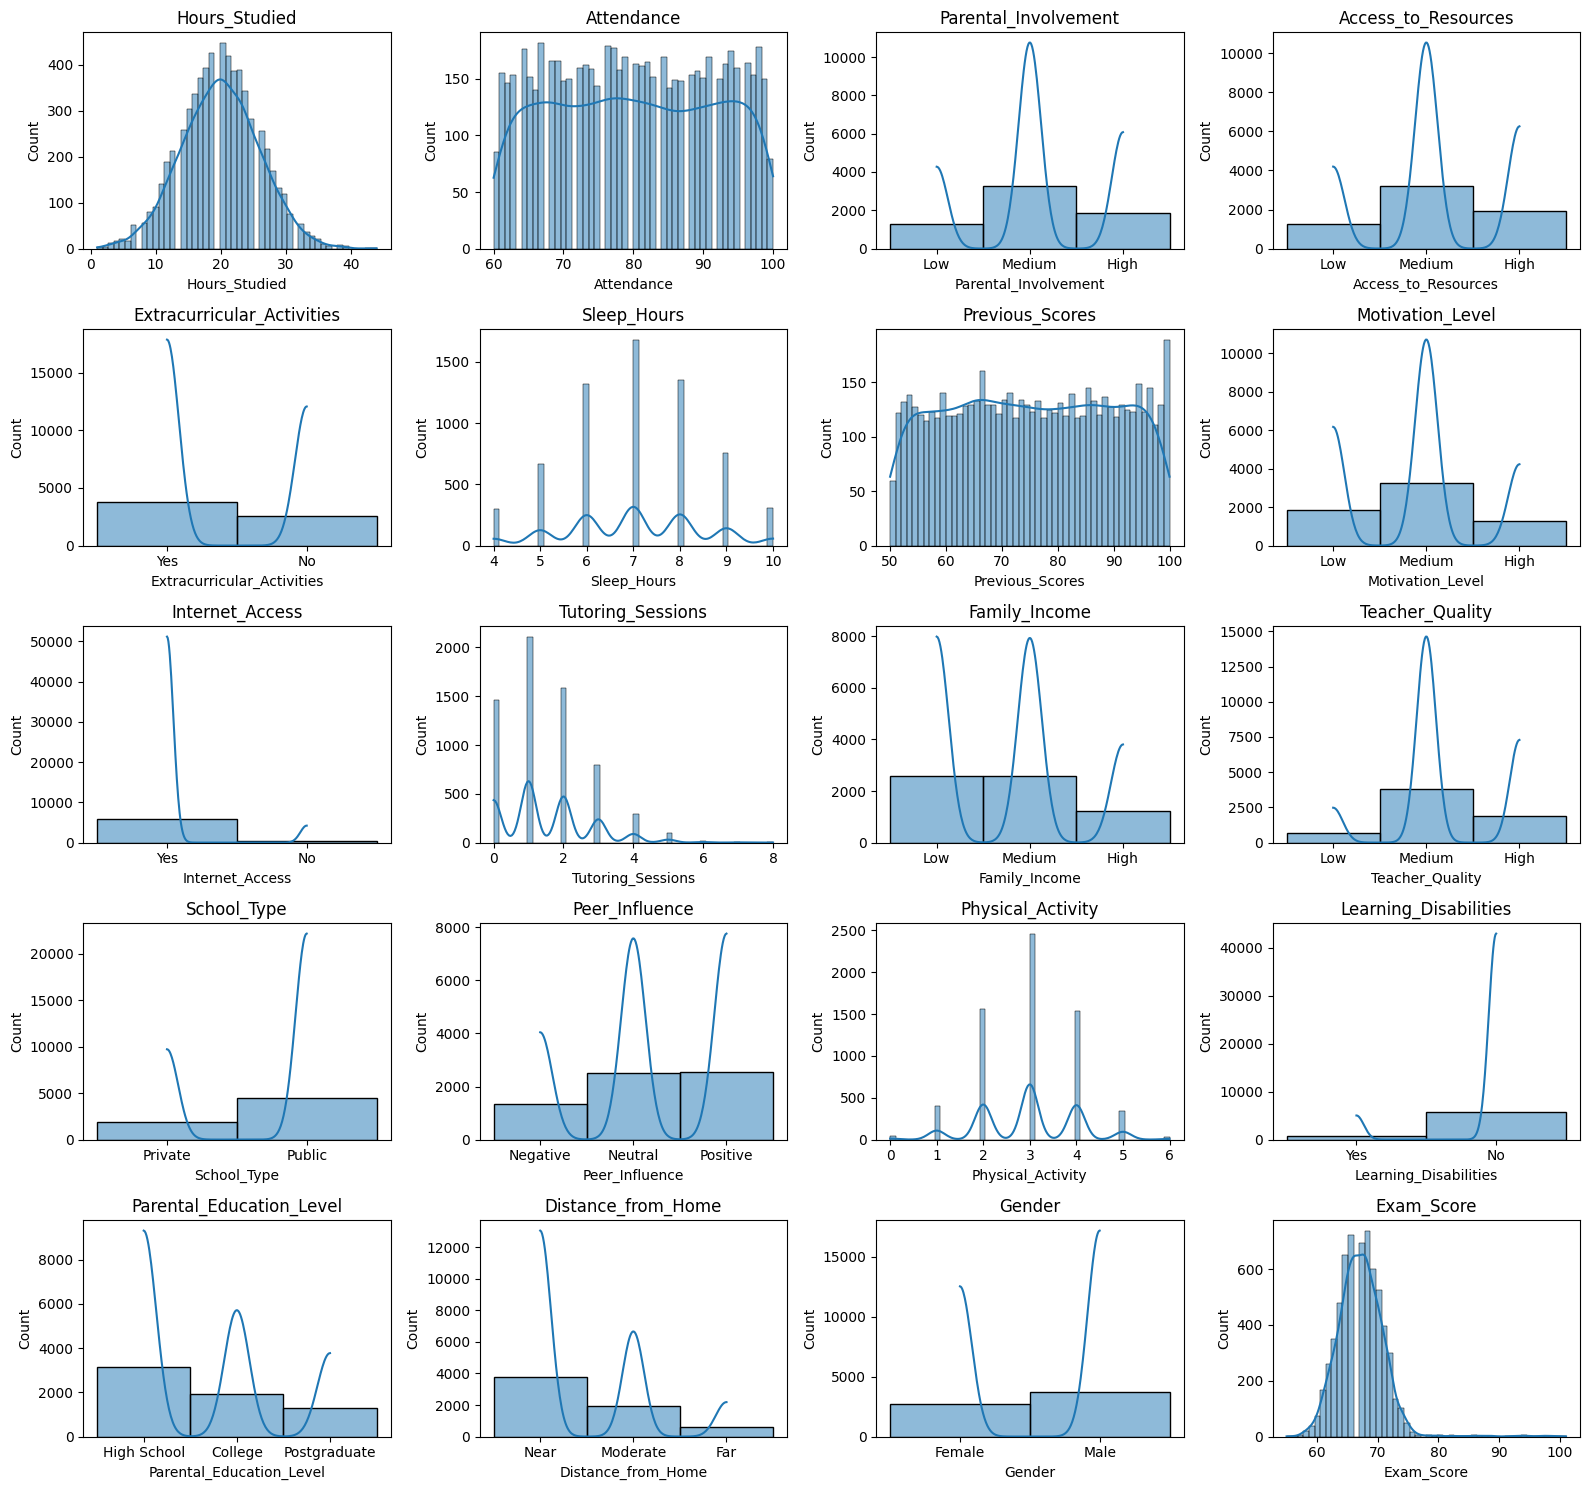

In [41]:
# Посмотрим распределение данных по каждому признаку
import matplotlib.pyplot as plt

n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


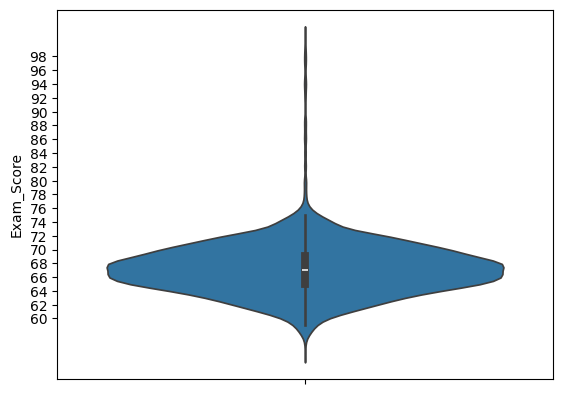

,Exam_Score
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


In [42]:
# Теперь отдельно исследуем целевую переменную Exam_Score
ax = sns.violinplot(df["Exam_Score"])

ax.set_yticks([i for i in range(60, 100, 2)])

plt.show()
df["Exam_Score"].describe()

Распределение значений переменной Exam_Score напоминает распределение нормальное распределение с небольшим среднеквадратичным отклонением. Межквартильный размах составляет около 4. Это потенциально может осложнить задачу классификации, если категоризировать данные в соотношении Меньше 50: F, 50-60: E, 60-70: D, 70-80: C, 80-90: B, 90-100: A.

In [43]:
# Найдем 6 перцентелей и по ним построим шкалу оценивания
percentiles_values = [51, 61, 71, 81, 91, 101]
print(list(percentiles_values))
labels = ['E', 'D', 'C', 'B', 'A']

# Построим шкалу оценивания
df['Exam_Score_Scaled'] = pd.cut(df['Exam_Score'], bins=percentiles_values, labels=labels, right=False, include_lowest=True)
df['Exam_Score_Scaled'] = df['Exam_Score_Scaled'].astype('category')
df['Exam_Score_Scaled'] = df['Exam_Score_Scaled'].cat.reorder_categories(labels, ordered=True)
print(df[['Exam_Score', 'Exam_Score_Scaled']].head())
print(df['Exam_Score_Scaled'].value_counts())
df.dropna(axis=0, how='any', inplace=True)

[51, 61, 71, 81, 91, 101]
   Exam_Score Exam_Score_Scaled
0          67                 D
1          61                 D
2          74                 C
3          71                 C
4          70                 D
Exam_Score_Scaled
D    5182
C    1012
E     141
B      21
A      21
Name: count, dtype: int64


Как и ожидалось, данных за оценки B и A крайне мало, поэтому будем учитывать, что репрезентация на конце может быть не до конца точной.

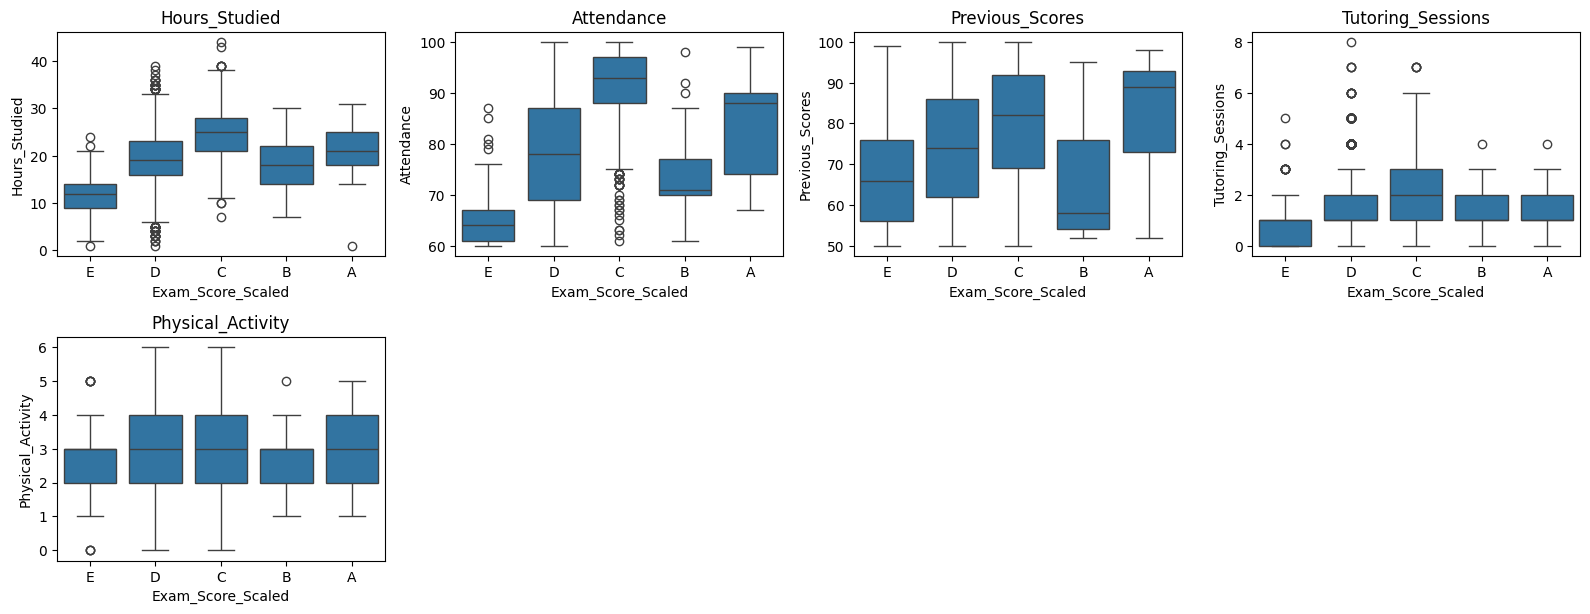

In [44]:
# Теперь посмотрим на зависимость оценки от других признаков (сначала численных)

import matplotlib.pyplot as plt

n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']):
    sns.boxplot(x='Exam_Score_Scaled', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Видим определенные зависимости оценки от количество часов на подготовку (медиана и процентили возрастают вместе с оценкой), степени посещения и предыдущей оценки. A и B выглядят выбросами из-за низкой размерности. Будем учитывать эти признаки при построении модели. Проверим `Tutoring_Sessions` и `Physical_Activity` отдельно с помощью группировки

In [45]:
df.groupby(by='Exam_Score_Scaled')['Tutoring_Sessions'].describe()

/tmp/ipython-input-3079366577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='Exam_Score_Scaled')['Tutoring_Sessions'].describe()


,count,mean,std,min,25%,50%,75%,max
Exam_Score_Scaled,,,,,,,,
E,141.0,0.914894,1.024621,0.0,0.0,1.0,1.0,5.0
D,5182.0,1.442300,1.194325,0.0,1.0,1.0,2.0,8.0
C,1012.0,1.847826,1.380436,0.0,1.0,2.0,3.0,7.0
B,21.0,1.333333,1.064581,0.0,1.0,1.0,2.0,4.0
A,21.0,1.476190,1.077917,0.0,1.0,1.0,2.0,4.0


видим, что чем выше оценка, тем больше среднее количество часов проведенное с репетитором. Тоже будем учитывать

In [46]:
df.groupby(by='Exam_Score_Scaled')['Physical_Activity'].describe()

/tmp/ipython-input-2343645735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='Exam_Score_Scaled')['Physical_Activity'].describe()


,count,mean,std,min,25%,50%,75%,max
Exam_Score_Scaled,,,,,,,,
E,141.0,2.631206,1.104609,0.0,2.0,3.0,3.0,5.0
D,5182.0,2.971054,1.014626,0.0,2.0,3.0,4.0,6.0
C,1012.0,3.036561,1.080191,0.0,2.0,3.0,4.0,6.0
B,21.0,2.619048,0.973457,1.0,2.0,3.0,3.0,5.0
A,21.0,2.952381,1.116969,1.0,2.0,3.0,4.0,5.0


Аналогично смотрим в первую очередь на оценке E-C. Видим, что даже при большой размерности нет большой разницы между D и C. Тем не менее какой-то рост виден. Возможно, следует оставить этот признак для обучения.

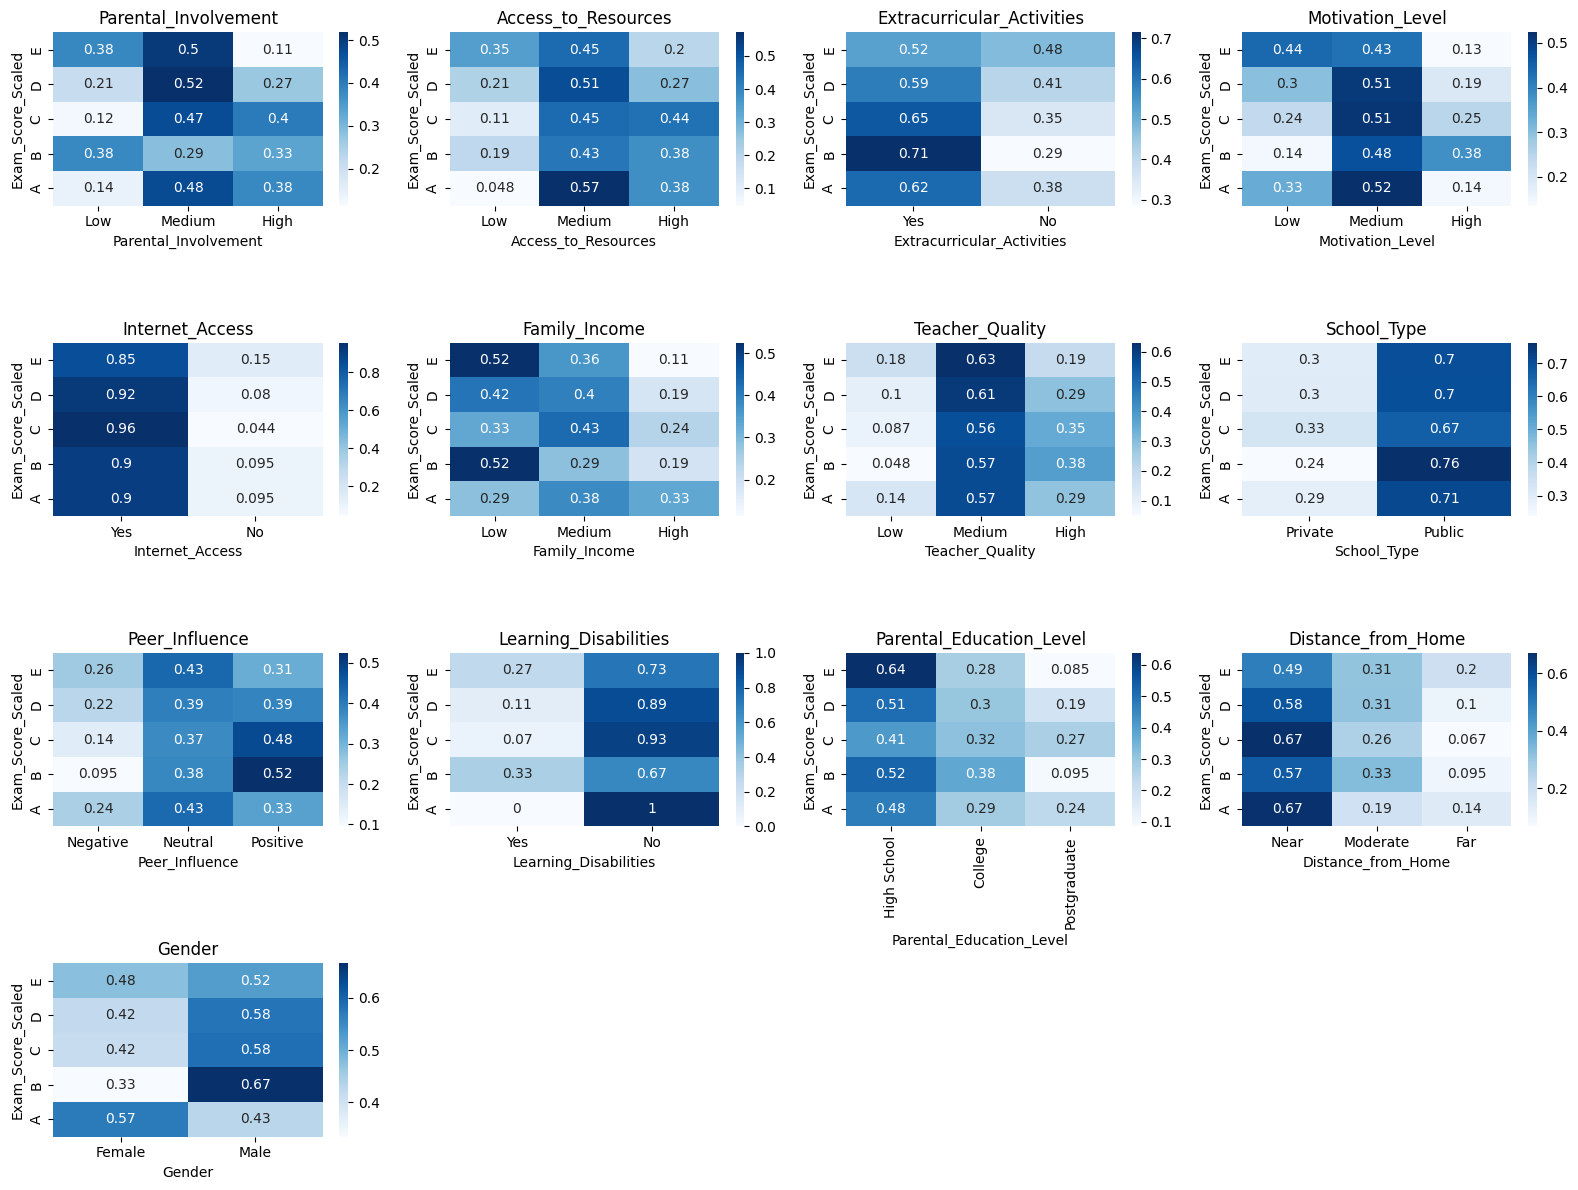

In [47]:
# Теперь исследуем зависимость оценки от категориальных признаков
categorical_columns = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender',
]
n_cols = 4
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    contingency_table = pd.crosstab(df['Exam_Score_Scaled'], df[col], normalize='index')
    sns.heatmap(contingency_table, annot=True, ax=axes[i], cmap='Blues')

    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Видим потенциальное влияние признаков `Parental_Involvement`, `Access_to_Resources`, `Extracurrical_Activities`, `Motivation_Level`, `Family_Income`, `Teacher_Quality`, `Peer_Influence`, `Learning_Disabilities`, `Parental_Education_Level`, `Distance_from_Home` на оценку статистики `Exam_Score_Scaled`. Наблюдаются ожидаемые выбросы на B и A, но остальные оценки скорее связаны.

Оказалось, что тип школы не имеют прямой связи с оценкой напрямую

Почему?
Если на остальных оценках мы наблюдаем монотонный рост или падение процента категории относительно оценки, то на признаках `School_Type` этого не видно. Например, лишь 85% из тех, кто сдал на F имел доступ к интернету. При этом среди тех, кто сдал на C 96%. В то же время, если мы смотрим, например, на тип школы и его связь с оценками, то и для худшей оценки "F" мы видим, что из тех кто ее получил - 70% выпускники обычных школ, так и для оценки "B" 70% выпускники обычных школ, и для средней C 67%

##### Подбор модели и обучение

In [48]:
# Выберем все столбцы, кроме School_Type
model_dataset = df.drop(['School_Type'], axis=1)
model_dataset.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,category
Access_to_Resources,category
Extracurricular_Activities,category
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,category
Internet_Access,category
Tutoring_Sessions,int64


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Parental_Education_Level', 'Access_to_Resources', 'Motivation_Level',
        'Internet_Access', 'Family_Income', 'Teacher_Quality', 'Peer_Influence',
        'Learning_Disabilities', 'Parental_Involvement', 'Distance_from_Home',
        'Extracurricular_Activities', 'Exam_Score_Scaled', 'Gender']

for col in cols:
    model_dataset[col] = le.fit_transform(model_dataset[col])
model_dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Exam_Score_Scaled
0,23,84,1,0,0,7,73,1,1,0,1,2,2,3,0,1,2,1,67,3
1,19,64,1,2,0,8,59,1,1,2,2,2,0,4,0,0,1,0,61,3
2,24,98,2,2,1,7,91,2,1,2,2,2,1,4,0,2,2,1,74,2
3,29,89,1,2,1,8,98,2,1,1,2,2,0,4,0,1,1,1,71,2
4,19,92,2,2,1,6,65,2,1,3,2,0,1,4,0,0,2,0,70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,2,2,0,1,2,0,68,3
6603,23,76,0,2,0,8,81,2,1,3,1,0,2,2,0,1,2,0,69,3
6604,20,90,2,1,1,6,65,1,1,3,1,2,0,2,0,2,2,0,68,3
6605,10,86,0,0,1,6,91,0,1,2,1,2,2,3,0,1,0,0,68,3


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

X, y = model_dataset.drop(['Exam_Score_Scaled'], inplace=False, axis=1), model_dataset['Exam_Score_Scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

cv = StratifiedKFold(n_splits=3)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'RandomForest': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    'LogisticRegression': (LogisticRegression(max_iter=5000, solver='lbfgs'), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

best_estimators = {}
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=cv, scoring='accuracy')
    data = X_train_scaled if name != 'RandomForest' else X_train
    grid.fit(data, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f'{name} best params: {grid.best_params_}')
    print(f'{name} best CV accuracy: {grid.best_score_:.3f}')

SVM best params: {'C': 1, 'kernel': 'linear'}
SVM best CV accuracy: 0.999
RandomForest best params: {'max_depth': None, 'n_estimators': 50}
RandomForest best CV accuracy: 0.995
LogisticRegression best params: {'C': 10}
LogisticRegression best CV accuracy: 0.996
KNN best params: {'n_neighbors': 5}
KNN best CV accuracy: 0.884


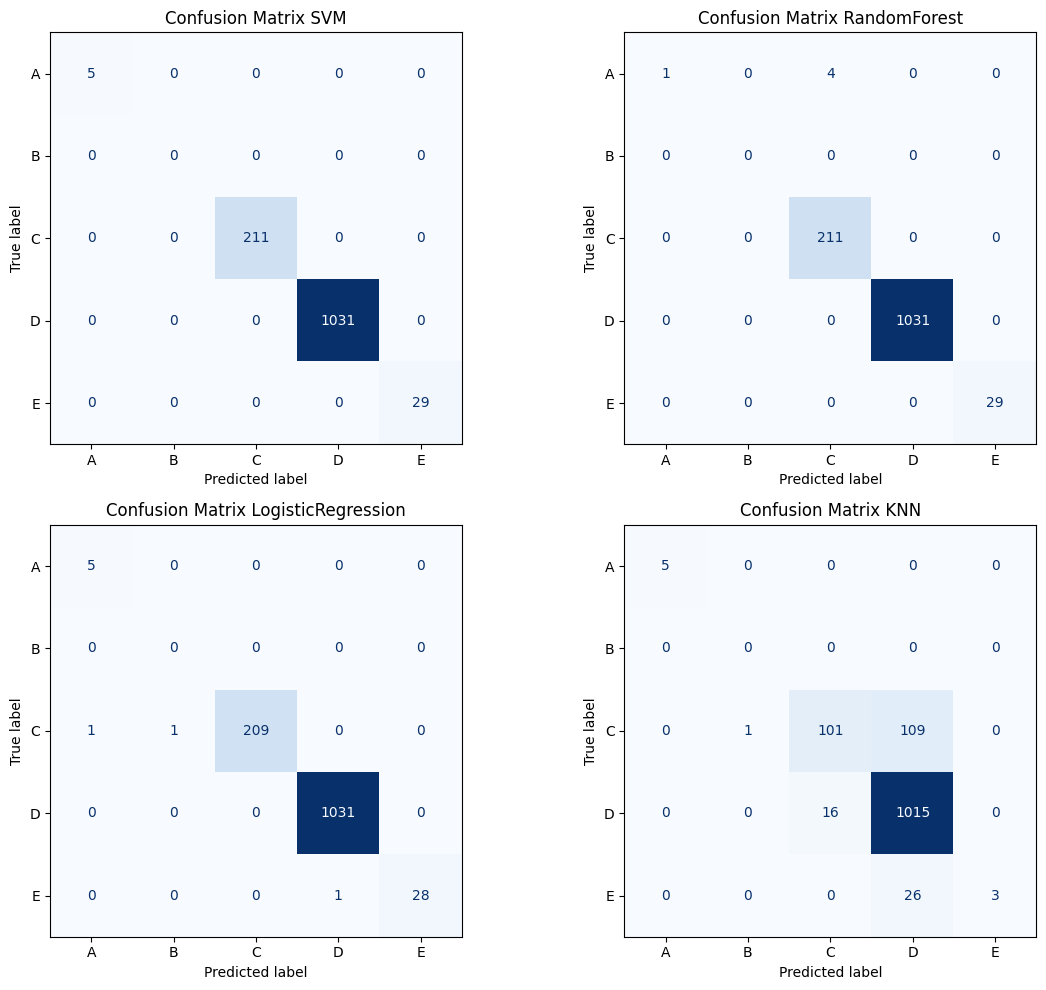

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(best_estimators.items()):
    if name == 'RandomForest':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)

    all_classes = sorted(np.unique(model_dataset['Exam_Score_Scaled']))
    cm = confusion_matrix(y_test, y_pred, labels=all_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C', 'D', 'E'])

    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title(f'Confusion Matrix {name}')

plt.tight_layout()
plt.show()



Получились впечатляющие результаты при применении методов SVM, Случайных лесов и логистической регрессии. Качество после кросс-валидации больше 99% на тестовом наборе. Это может быть ожидаемо, исходя из графиков которые мы наблюдали раньше, которые показывали зависимость близкую к линейной для многих признаков и целевой переменной. Но это также может быть признаком переобучения, поэтому проведем дополнительные проверки

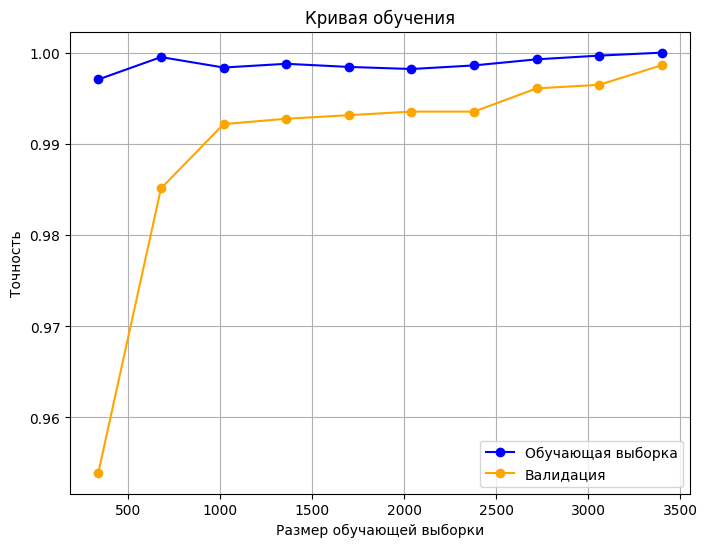

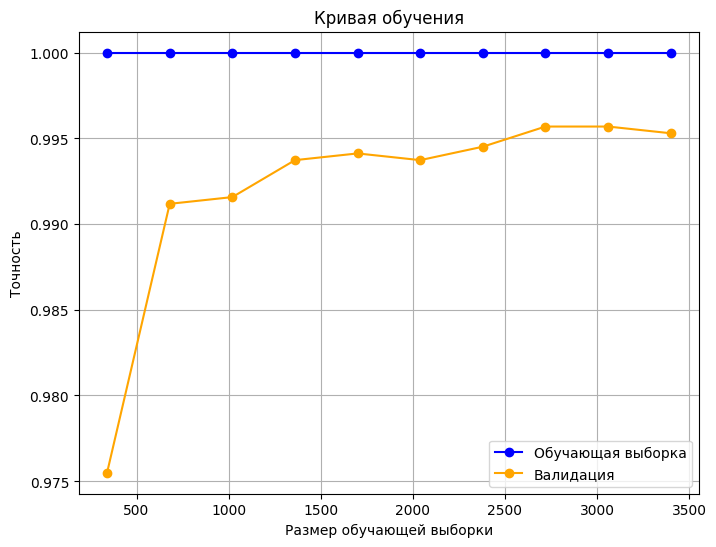

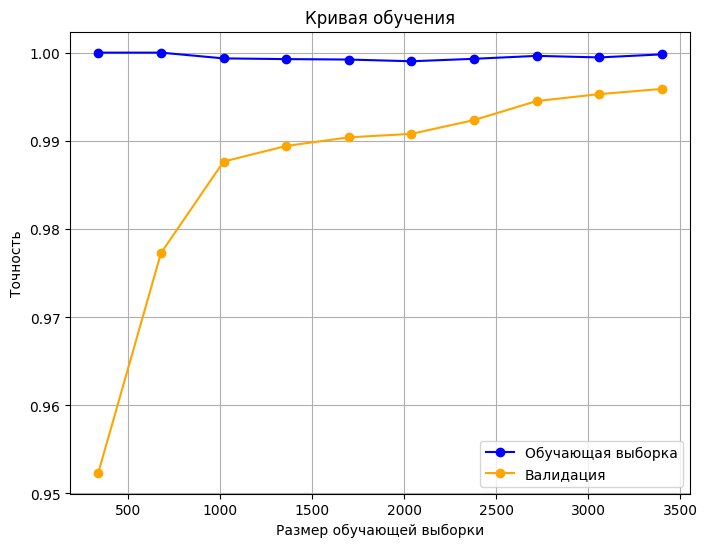

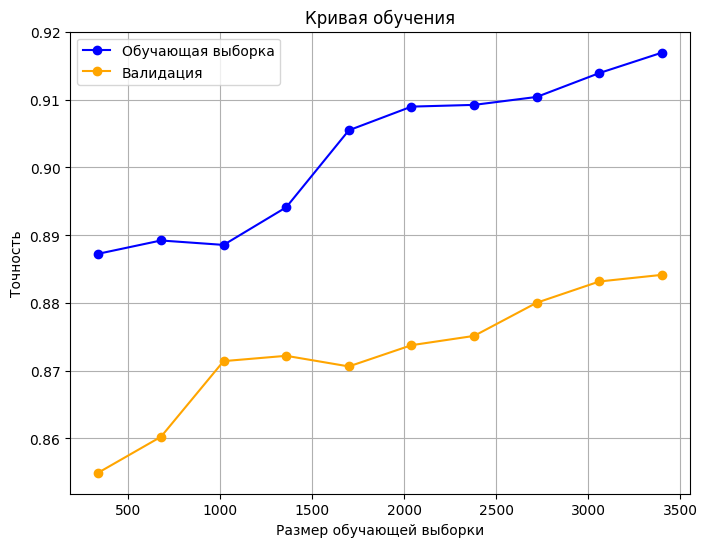

In [69]:
# Построим кривые обучения

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Обучающая выборка')
    plt.plot(train_sizes, valid_mean, 'o-', color='orange', label='Валидация')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Точность')
    plt.title('Кривая обучения')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(best_estimators['SVM'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))
plot_learning_curve(best_estimators['RandomForest'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))
plot_learning_curve(best_estimators['LogisticRegression'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))
plot_learning_curve(best_estimators['KNN'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))

Заметим, что все модели, кроме KNN после преодоления размера обучающей выборки 2000, стабилизируются, разрыв между обучающей и валидационной точностью значительно снижается. Это означает, что модели склонны к оверфиттингу только на самых малых выборках, а не на больших. Быстрее всего стабилизируется SVM, поэтому ее вероятно можно считать лучшим решением. Также SVM показывает лучшее качество